In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error
pd.set_option('display.max_columns', None)

In [98]:
main_df = pd.read_csv("../data/raw/ems_2025.csv")

In [99]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1079491 non-null  int64  
 1   incident_datetime               1079491 non-null  object 
 2   initial_call_type               1079491 non-null  object 
 3   initial_severity_level_code     1079491 non-null  int64  
 4   final_call_type                 1079491 non-null  object 
 5   final_severity_level_code       1079491 non-null  int64  
 6   first_assignment_datetime       1056283 non-null  object 
 7   valid_dispatch_rspns_time_indc  1079491 non-null  object 
 8   dispatch_response_seconds_qy    1079491 non-null  int64  
 9   first_activation_datetime       1054306 non-null  object 
 10  first_on_scene_datetime         1014350 non-null  object 
 11  valid_incident_rspns_time_indc  1079491 non-null  object 
 12  

In [100]:
main_df.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_travel_tm_seconds_qy',
       'incident_close_datetime', 'held_indicator',
       'incident_disposition_code', 'borough', 'incident_dispatch_area',
       'zipcode', 'policeprecinct', 'citycouncildistrict', 'communitydistrict',
       'communityschooldistrict', 'congressionaldistrict', 'reopen_indicator',
       'special_event_indicator', 'standby_indicator', 'transfer_indicator',
       'incident_response_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime'],
      dtype='object')

In [101]:

#drop_cols = ['travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type']
#main_drop_cols = ['incident_response_sec','travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type'] 

In [102]:
drop_cols = ["incident_travel_tm_seconds_qy","dispatch_response_seconds_qy","incident_close_datetime","first_hosp_arrival_datetime", "first_to_hosp_datetime","first_on_scene_datetime","first_activation_datetime","first_assignment_datetime","final_severity_level_code","final_call_type"]



In [103]:
main_df = main_df.drop(columns=drop_cols)

In [104]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1079491 non-null  int64  
 1   incident_datetime               1079491 non-null  object 
 2   initial_call_type               1079491 non-null  object 
 3   initial_severity_level_code     1079491 non-null  int64  
 4   valid_dispatch_rspns_time_indc  1079491 non-null  object 
 5   valid_incident_rspns_time_indc  1079491 non-null  object 
 6   held_indicator                  1079491 non-null  object 
 7   incident_disposition_code       1079491 non-null  object 
 8   borough                         1079491 non-null  object 
 9   incident_dispatch_area          1079491 non-null  object 
 10  zipcode                         1049764 non-null  float64
 11  policeprecinct                  1049790 non-null  float64
 12  

In [105]:
main_df.isna().sum()

cad_incident_id                       0
incident_datetime                     0
initial_call_type                     0
initial_severity_level_code           0
valid_dispatch_rspns_time_indc        0
valid_incident_rspns_time_indc        0
held_indicator                        0
incident_disposition_code             0
borough                               0
incident_dispatch_area                0
zipcode                           29727
policeprecinct                    29701
citycouncildistrict               29701
communitydistrict                 29701
communityschooldistrict           30473
congressionaldistrict             29701
reopen_indicator                      0
special_event_indicator               0
standby_indicator                     0
transfer_indicator                    0
incident_response_seconds_qy      65396
dtype: int64

In [106]:
main_df['cad_incident_id']

0          250010001
1          250010003
2          250010004
3          250010007
4          250010008
             ...    
1079486    252435374
1079487    252435375
1079488    252435378
1079489    252435381
1079490    252435382
Name: cad_incident_id, Length: 1079491, dtype: int64

In [107]:
main_df['incident_datetime'] = pd.to_datetime(main_df['incident_datetime'])

In [108]:
main_df['incident_datetime'].sort_values(ascending=True)

0         2025-01-01 00:00:12
1         2025-01-01 00:01:53
2         2025-01-01 00:01:58
3         2025-01-01 00:03:42
4         2025-01-01 00:04:36
                  ...        
1079486   2025-08-31 23:58:45
1079487   2025-08-31 23:58:59
1079488   2025-08-31 23:59:22
1079489   2025-08-31 23:59:52
1079490   2025-08-31 23:59:55
Name: incident_datetime, Length: 1079491, dtype: datetime64[ns]

In [109]:
main_df['incident_datetime'].sort_values(ascending=False)

1079490   2025-08-31 23:59:55
1079489   2025-08-31 23:59:52
1079488   2025-08-31 23:59:22
1079487   2025-08-31 23:58:59
1079486   2025-08-31 23:58:45
                  ...        
4         2025-01-01 00:04:36
3         2025-01-01 00:03:42
2         2025-01-01 00:01:58
1         2025-01-01 00:01:53
0         2025-01-01 00:00:12
Name: incident_datetime, Length: 1079491, dtype: datetime64[ns]

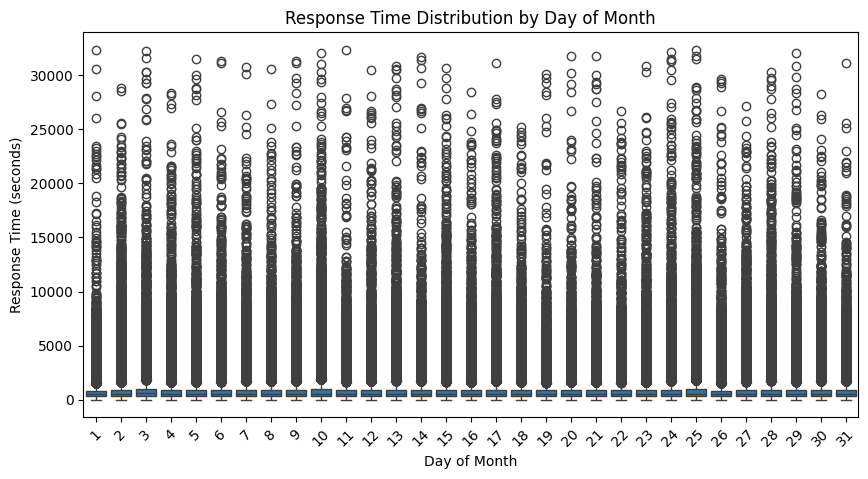

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(x=main_df['incident_datetime'].dt.day,y=main_df['incident_response_seconds_qy'])
plt.xticks(rotation=45)
plt.title("Response Time Distribution by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Response Time (seconds)")
plt.show()

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

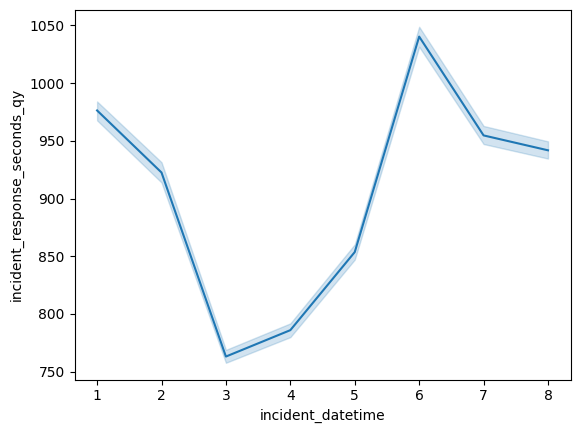

In [111]:
sns.lineplot(
    x=main_df['incident_datetime'].dt.month,
    y=main_df['incident_response_seconds_qy'],
    estimator='mean'
)

In [112]:
main_df.groupby(main_df["incident_datetime"].dt.to_period("M")).size()

incident_datetime
2025-01    138016
2025-02    120301
2025-03    132609
2025-04    132074
2025-05    138231
2025-06    140120
2025-07    142239
2025-08    135901
Freq: M, dtype: int64

In [113]:
time_df = main_df[['incident_datetime', 'incident_response_seconds_qy']]

In [114]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 2 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   incident_datetime             1079491 non-null  datetime64[ns]
 1   incident_response_seconds_qy  1014095 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.5 MB


In [115]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy    65396
dtype: int64

In [116]:
time_df=time_df.set_index('incident_datetime')

In [117]:
time_df

,incident_response_seconds_qy
incident_datetime,
2025-01-01 00:00:12,NaN
2025-01-01 00:01:53,454.0
2025-01-01 00:01:58,0.0
2025-01-01 00:03:42,654.0
2025-01-01 00:04:36,284.0
...,...
2025-08-31 23:58:45,NaN
2025-08-31 23:58:59,283.0
2025-08-31 23:59:22,NaN


In [118]:
(time_df.resample("T").size()).max()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_92180/2167657732.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  (time_df.resample("T").size()).max()


np.int64(23)

In [120]:
time_df.resample("H").size()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_92180/965794262.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_df.resample("H").size()


incident_datetime
2025-01-01 00:00:00    152
2025-01-01 01:00:00    202
2025-01-01 02:00:00    154
2025-01-01 03:00:00    136
2025-01-01 04:00:00    126
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 5832, dtype: int64

In [121]:
## incident countsforecast

In [122]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1079491 entries, 2025-01-01 00:00:12 to 2025-08-31 23:59:55
Data columns (total 1 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   incident_response_seconds_qy  1014095 non-null  float64
dtypes: float64(1)
memory usage: 16.5 MB


In [123]:
time_df.isna().sum()

incident_response_seconds_qy    65396
dtype: int64

In [124]:
hourly_counts = time_df.resample("H").size()
hourly_counts = hourly_counts.to_frame(name="incident_count")


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_92180/1160403121.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [125]:
hourly_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5832 entries, 2025-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   incident_count  5832 non-null   int64
dtypes: int64(1)
memory usage: 91.1 KB


In [126]:
hourly_counts = time_df.resample("H").size()


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_92180/699213276.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [127]:
hourly_counts.isna().sum()


np.int64(0)

In [128]:
hourly_counts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5832 entries, 2025-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Series name: None
Non-Null Count  Dtype
--------------  -----
5832 non-null   int64
dtypes: int64(1)
memory usage: 91.1 KB


In [129]:
hourly_counts

incident_datetime
2025-01-01 00:00:00    152
2025-01-01 01:00:00    202
2025-01-01 02:00:00    154
2025-01-01 03:00:00    136
2025-01-01 04:00:00    126
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 5832, dtype: int64

<Axes: xlabel='incident_datetime'>

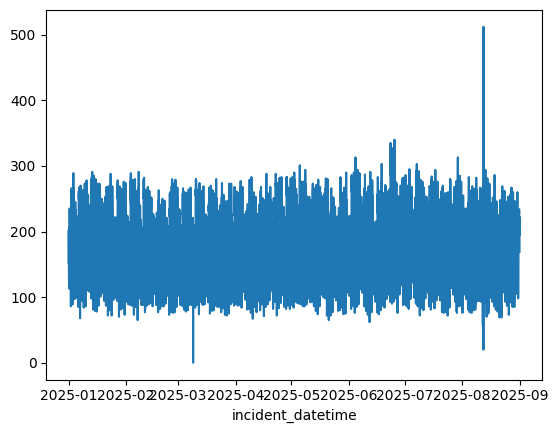

In [132]:
sns.lineplot(data=hourly_counts)